# IN THE NAME OF GOD
### 
## classification modeling
##### 
### kh-Abedi
# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
from sklearn.neighbors import KNeighborsClassifier

In [2]:
warnings.simplefilter(action = 'ignore')
plt.style.use('seaborn')

In [3]:
#   Import data
data = pd.read_csv('B_practice.csv')
data

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

# 
#  handling data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df = pd.DataFrame(data)
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

#### Above describtion shows Experience column has negative number , this is impossible!
#  

In [6]:
#how many negative numbers are there in experience column?
np.sum((df['Experience']<0).ravel())

52

In [7]:
# change negative to positive
df['Experience']= abs(df['Experience'])

In [8]:
#how many negative numbers are there in each column?
df.lt(0).sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

####  now there isn't any negative number in data
# 

In [9]:
#change column name to standard type
df = df.rename(columns = {'ZIP Code':'ZIP_Code','Personal Loan':'Personal_Loan','Securities Account':'Securities_Account','CD Account':'CD_Account'})
df.describe() 

ID          Age   Experience       Income      ZIP_Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.134600    73.774200  93152.503000   
std    1443.520003    11.463166    11.415189    46.033729   2121.852197   
min       1.000000    23.000000     0.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [10]:
### experience column is  according to year
### income column is  according to year
### CCAvg column is  according to month
## so i change CCAvg column to be according to year
df['CCAvg'] = df['CCAvg']*12
df

ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4   19.2          1   
1        2   45          19      34     90089       3   18.0          1   
2        3   39          15      11     94720       1   12.0          1   
3        4   35           9     100     94112       1   32.4          2   
4        5   35           8      45     91330       4   12.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1   22.8          3   
4996  4997   30           4      15     92037       4    4.8          1   
4997  4998   63          39      24     93023       2    3.6          3   
4998  4999   65          40      49     90034       3    6.0          2   
4999  5000   28           4      83     92612       3    9.6          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [11]:
### ID and ZIP Code don't have any affect on target , so i decide to drop them
df.drop(['ID','ZIP_Code'], axis =1 , inplace=True)
df = df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']]
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4   19.2          1         0   
1      45          19      34       3   18.0          1         0   
2      39          15      11       1   12.0          1         0   
3      35           9     100       1   32.4          2         0   
4      35           8      45       4   12.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1   22.8          3         0   
4996   30           4      15       4    4.8          1        85   
4997   63          39      24       2    3.6          3         0   
4998   65          40      49       3    6.0          2         0   
4999   28           4      83       3    9.6          1         0   

      Securities_Account  CD_Account  Online  CreditCard  Personal_Loan  
0                      1           0       0           0              0  
1                      1           0       0           0              0  
2                      0           0       0           0              0  
3                      0           0       0           0              0  
4                      0           0       0           1              0  
...                  ...         ...     ...         ...            ...  
4995                   0           0       1           0              0  
4996                   0           0       1           0              0  
4997                   0           0       0           0              0  
4998                   0           0       1           0              0  
4999                   0           0       1           1              0  

[5000 rows x 12 columns]

# 
# 
## checking existence of noise
### 
### categorical

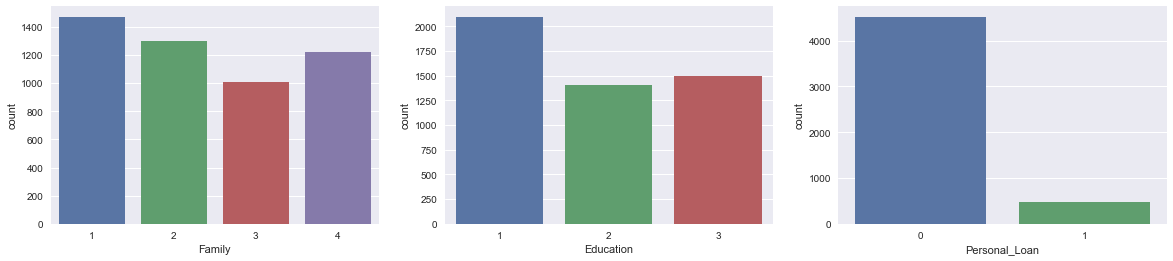

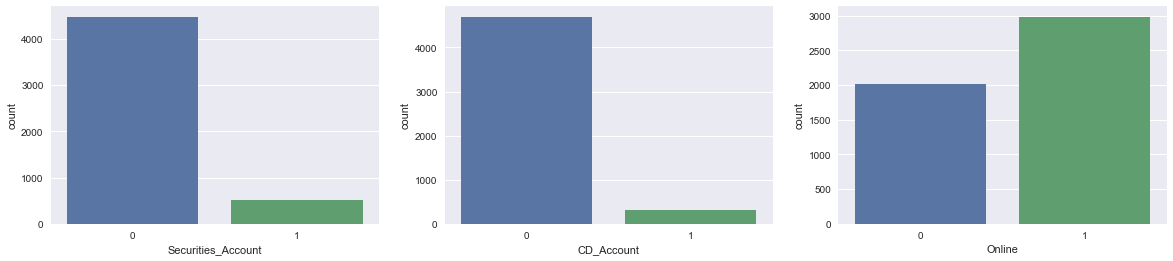

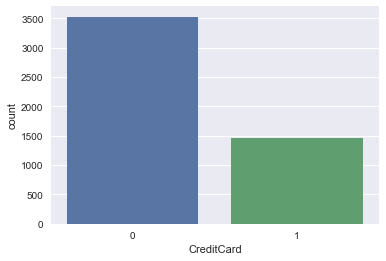

In [12]:
Categorical = ['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']
i = 0
while i<8:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,3,1)                         #(one row, 3 plots, first one)
    sns.countplot(x = Categorical[i], data=df) # read each one, from Data
    i += 1
    if i==7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x = Categorical[i], data=df) # row one , second plot
    i += 1
    plt.subplot(1,3,3)
    sns.countplot(x = Categorical[i], data=df) # row one , second plot
    i += 1
    plt.show()

### 
### Numerical

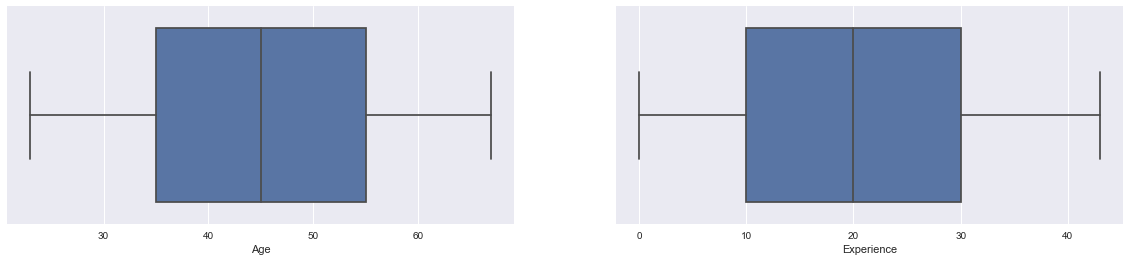

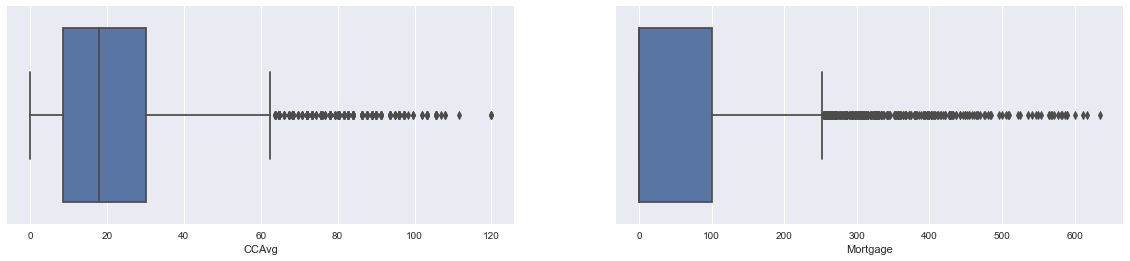

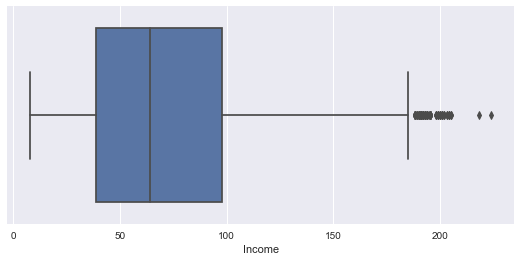

In [13]:
# box plot is suitable for continiues
# box plot is suitable to find nois, but if a far point is rational isn't noise
Numerical = ['Age','Experience','CCAvg','Mortgage','Income']
i = 0
while i<5:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,2,1)   #(one row, two plots, first one)
    sns.boxplot(x = Numerical[i], data=df) # read each one, from Data
    i += 1
    if i==5:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x = Numerical[i], data=df) # row one , second plot
    i += 1
    plt.show()

### As you can see , all categorical and numerical points are rational, so there is not any noise
# 

## missing values

In [14]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Personal_Loan         0
dtype: int64

###  there is not any missing values

# 
# 
# reproccessing and visualizing data
# 
### how many people accepted Personal Loan?

In [15]:
import plotly.express as px
s = pd.DataFrame(df["Personal_Loan"].value_counts())
fig = px.pie(s,values ="Personal_Loan", names = ["not accept_loan","accept_loan"] , hole = 0.45 , opacity = 0.9, labels = {"label" : "Personal Loan" , "Personal Loan":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie chart of accepting loan"))
fig.update_traces(textposition = "outside" , textinfo ="percent+label")
fig.show()

### just 9.6% of people accepted Personal Loan
# 
# 
# 
### what persentage of people  have Mortgage?

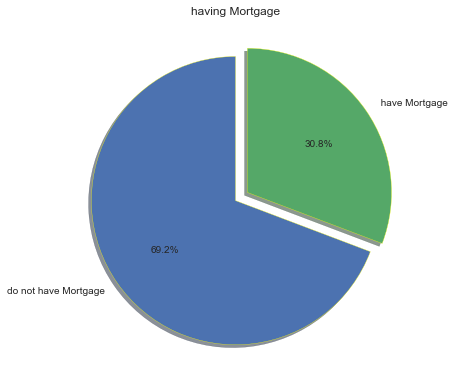

In [134]:
slices = [np.sum((df['Mortgage']==0).ravel()), np.sum((df['Mortgage']!=0).ravel())]
labels = ['do not have Mortgage', ' have Mortgage']
explode = (0,0.1)
plt.pie(slices,labels=labels,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'yellow'})
plt.title('having Mortgage')
plt.tight_layout()
plt.show()

### 30.8% of people have Mortgage
# 
# 
# 
### visualizing family members 

In [17]:
t = pd.DataFrame(df["Family"].value_counts())
fig = px.pie(t,values ="Family", names = ["1 member", "2 member", "3 member", "4 member"] , hole = 0.45 , opacity = 0.9, labels = {"label" : "Personal Loan" , "Personal Loan":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie chart of Family members"))
fig.update_traces(textposition = "outside" , textinfo ="percent+label")
fig.show()

### Categorical analisys

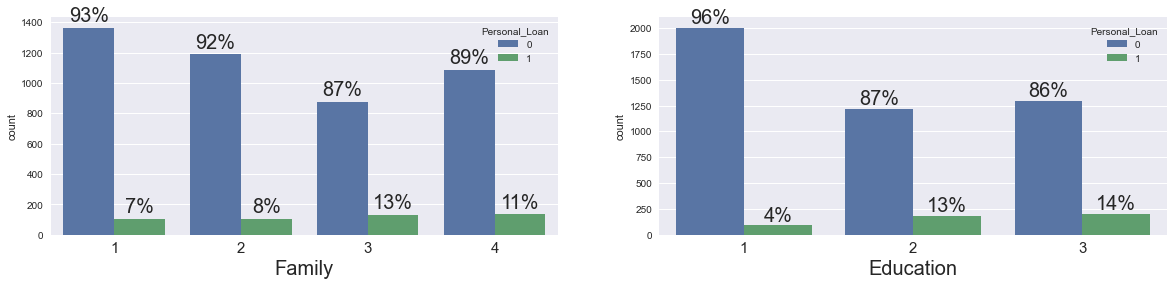

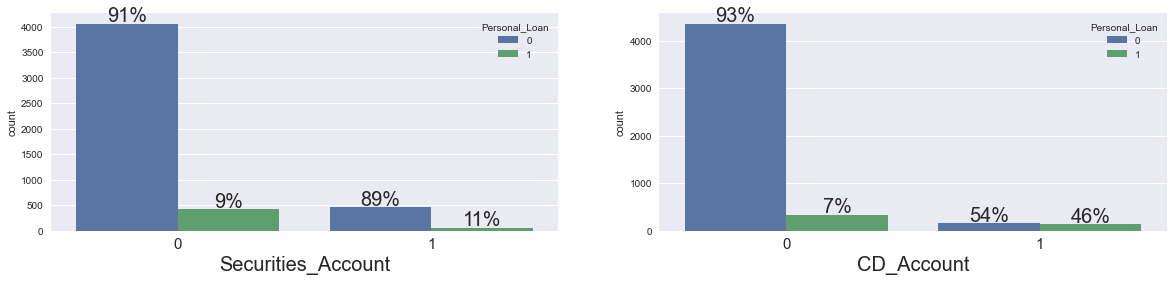

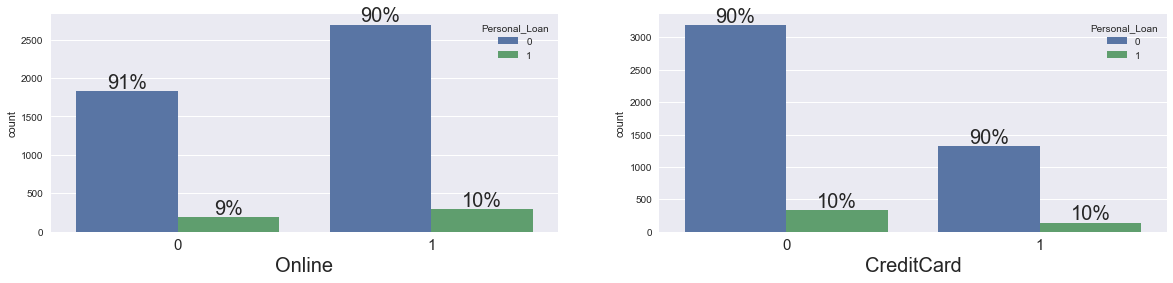

In [18]:
categorical = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard']
i = 0
while i<6:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,2,1)                         
    ax = sns.countplot(x = categorical[i], hue ="Personal_Loan", data=df) 
    plt.xticks(fontsize=15)
    plt.xlabel(categorical[i],fontsize=20)
    i += 1
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center", size = 20)
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center", size = 20)
    
    plt.subplot(1,2,2)
    ax = sns.countplot(x = categorical[i], hue ="Personal_Loan", data=df) 
    plt.xticks(fontsize=15)
    plt.xlabel(categorical[i],fontsize=20)
    i += 1
    
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center", size = 20)
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center", size = 20)
    
    plt.show()

#### observations:
#### 1 - families with 3 member more than the others , accept Personal Loan.
#### 2 - advanced educated people , more than the others , accept Personal Loan.
#### 3 - 11% of people who have securities account , more than the others , accept Personal Loan.
#### 4 - 46% of people who have CD account , accept Personal Loan.
#### 5 - people who were online in the bank , more than the others , accept Personal Loan.
#### 6 -  people who don't have Credit card , more than the others , accept Personal Loan.
# 

### Numerical analisys

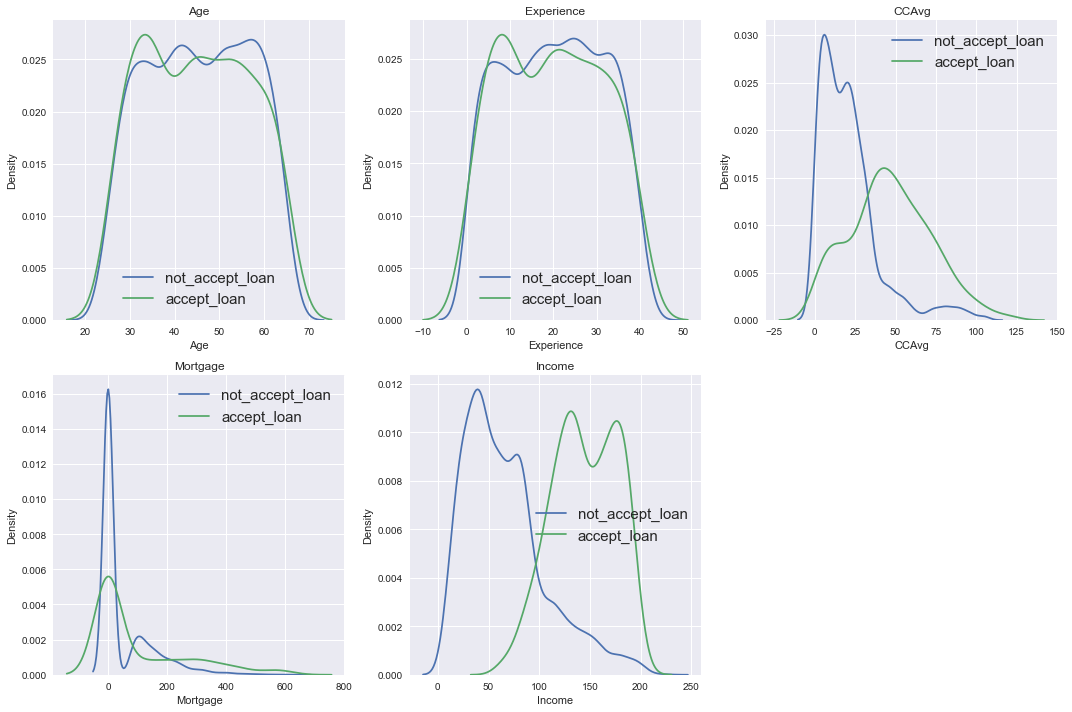

In [19]:
# visualizing the distribution of acceptig loan or not , for each column
# kernel density
Numerical = ['Age','Experience','CCAvg','Mortgage','Income']
not_accept_loan = df.query("Personal_Loan == 0")
accept_loan = df.query("Personal_Loan == 1")

plt.figure(figsize = (15,10))
for ax, col in enumerate(Numerical):
    plt.subplot(2,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = not_accept_loan[col], label = "not_accept_loan")
    sns.kdeplot(x = accept_loan[col], label = "accept_loan")
    plt.legend(fontsize =15)
plt.tight_layout()

#### observations:
#### 1) Age graph :            age between 31 and 33, more than the others , don't accept personal loan.
#### 2) Age graph :             age of 42 and 51-58 , more than the others , accept personal loan.
#### 3) Experience graph :   7 year experience, more than the others , don't accept personal loan.
#### 4) Experience graph :  13 - 27 year experience, more than the others , don't accept personal loan.
#### 5 ) CCAvg graph :   0 - 25 (k) spending per year , more than the others , don't accept personal loan.
#### 6) CCAvg graph :   30 - 50 (k) spending per year , more than the others , accept personal loan.
#### 7) Mortgage graph : people who don't have Mortgage  , more than the others , don't accept personal loan.
#### 8) Income graph : income 25 - 75 (k) per year, more than the others , don't accept personal loan.
#### 9) Income graph : income 120 - 180 (k) per year, more than the others , accept personal loan.
# 
# 

<AxesSubplot:xlabel='Experience', ylabel='count'>

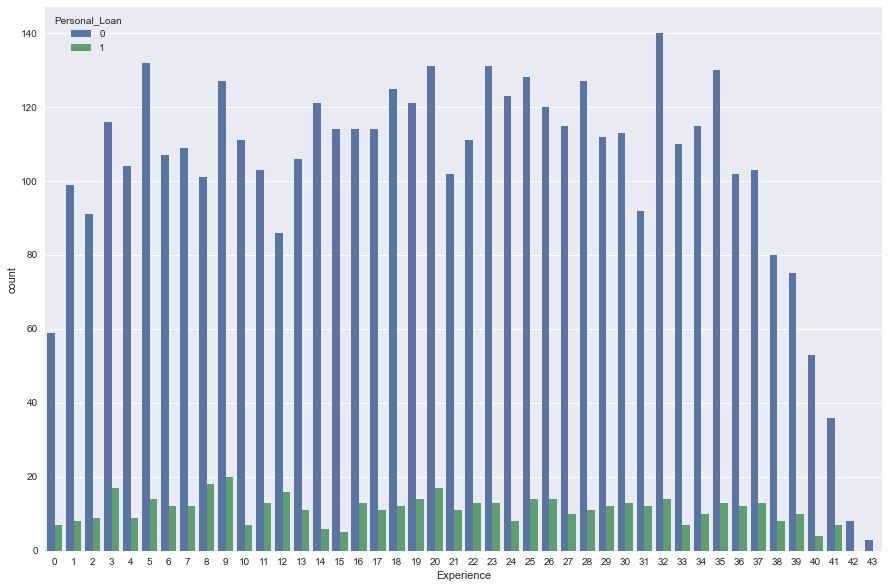

In [20]:
plt.figure(figsize = (15,10))
sns.countplot(x = df['Experience'], hue ="Personal_Loan", data=df) 

### people with 9 years experience , have more demand for loan
# 
# 

## correlation

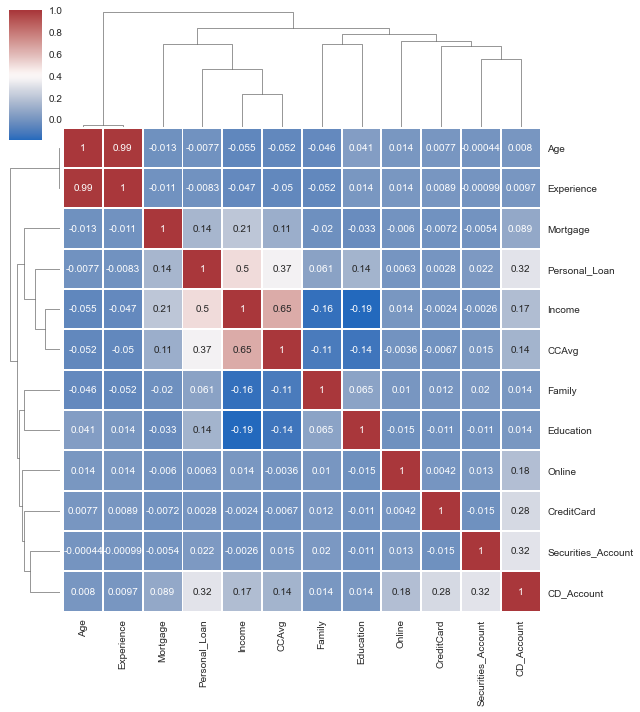

In [21]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2),annot = True, linewidths = .8, figsize = (9,10))
plt.show()

## sorting from most effective to less efective items on personal loan
#### 1 - Income                                                                          
#### 2 - CCAvg                                                                           
#### 3 - CD_Account
#### 4 - Education & Mortgage
#### 5 - Family
#### 6 - Securities_Account
#### 7 - Experience
#### 8 - Age
#### 9 - Online
#### 10 - CreditCard
# 
## obsevations:
### Age & Experience have high relation
###  Income & CCAvg are have high relation
### securities_Account & CD_Account have some  relation
### other items don't have obvious relation 
# 
# 

<AxesSubplot:xlabel='Age', ylabel='Income'>

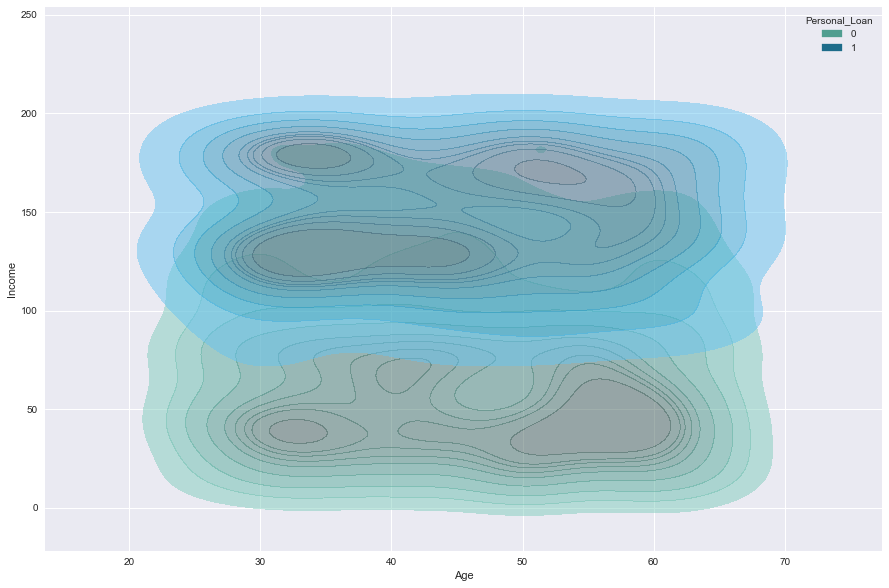

In [22]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['Age'], df['Income'],hue = "Personal_Loan",data=df,shade=True,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)



### dark blue show most demand for loan
### dark green show least demand for loan
### people with Income more than 110k and age between 30 to 45 most like to get loan
# 


<AxesSubplot:xlabel='Income', ylabel='CCAvg'>

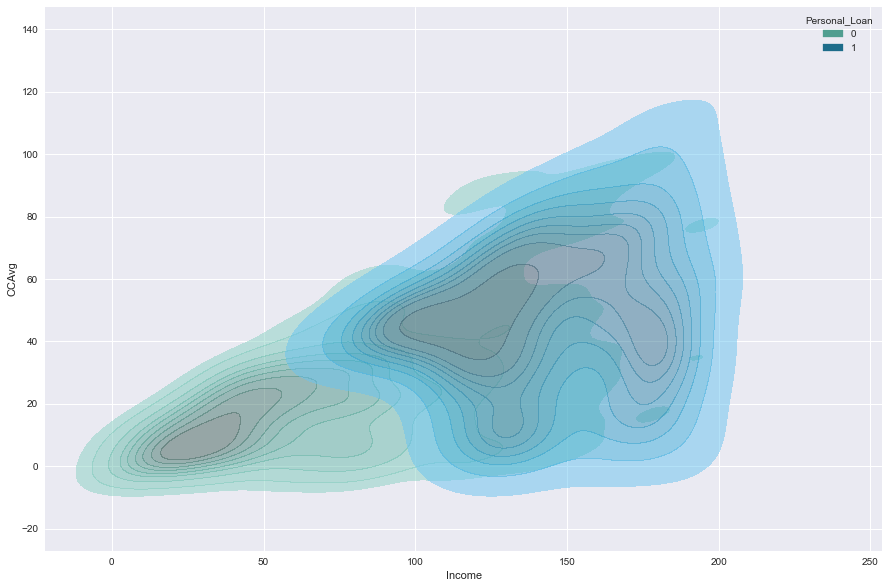

In [23]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['Income'], df['CCAvg'],hue = "Personal_Loan",data=df, color='red',shade=True,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

### dark blue show most demand for loan
### dark green show least demand for loan
# 
# 

<AxesSubplot:xlabel='Securities_Account', ylabel='CD_Account'>

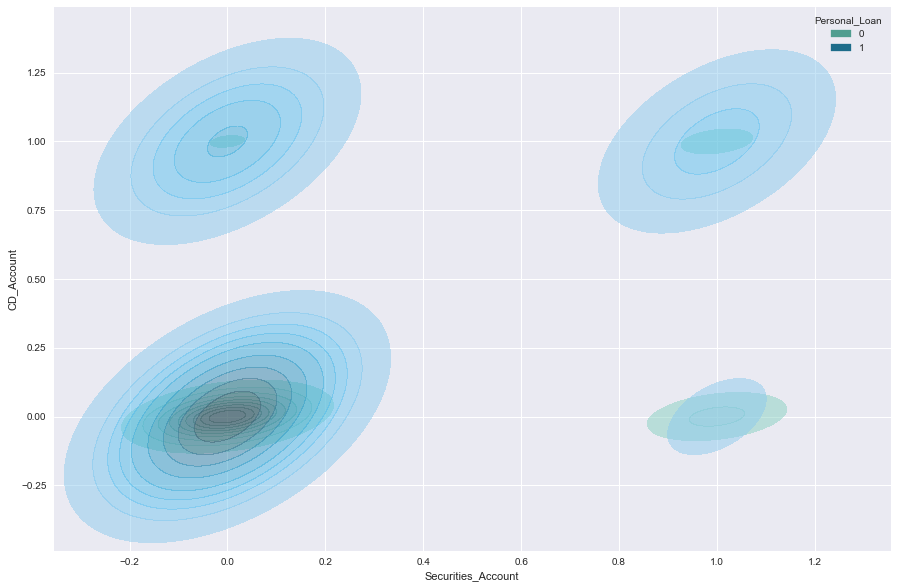

In [24]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['Securities_Account'], df['CD_Account'],hue = "Personal_Loan",data=df, color='red',shade=True,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

### dark blue show most demand for loan
### dark green show least demand for loan
# 
#

<AxesSubplot:xlabel='Age', ylabel='CCAvg'>

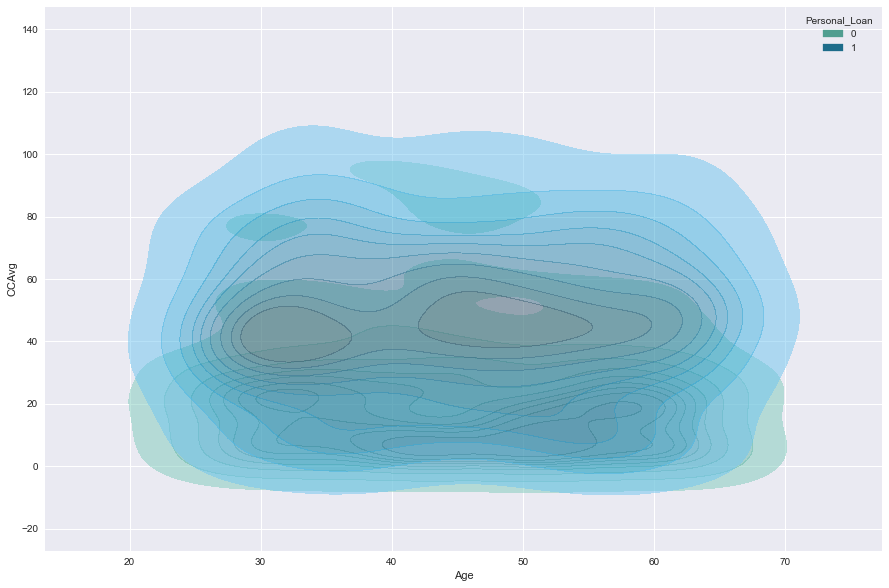

In [25]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['Age'], df['CCAvg'],hue = "Personal_Loan",data=df, color='red',shade=True,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

#### Above plot shows density of getting loan or not for Age and spending on credit cards per year
# 

<AxesSubplot:xlabel='Mortgage', ylabel='Income'>

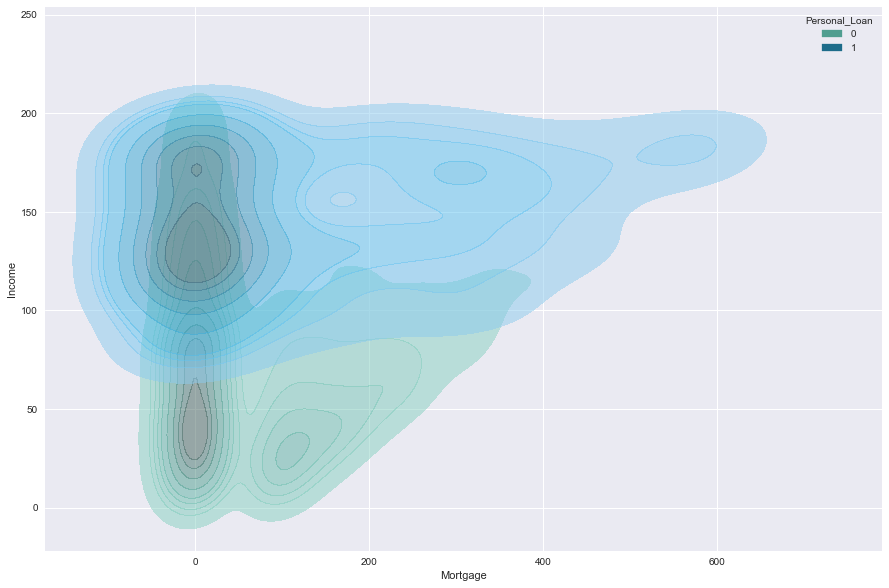

In [26]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['Mortgage'], df['Income'],hue = "Personal_Loan",data=df, color='red',shade=True,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

<AxesSubplot:xlabel='Experience', ylabel='Income'>

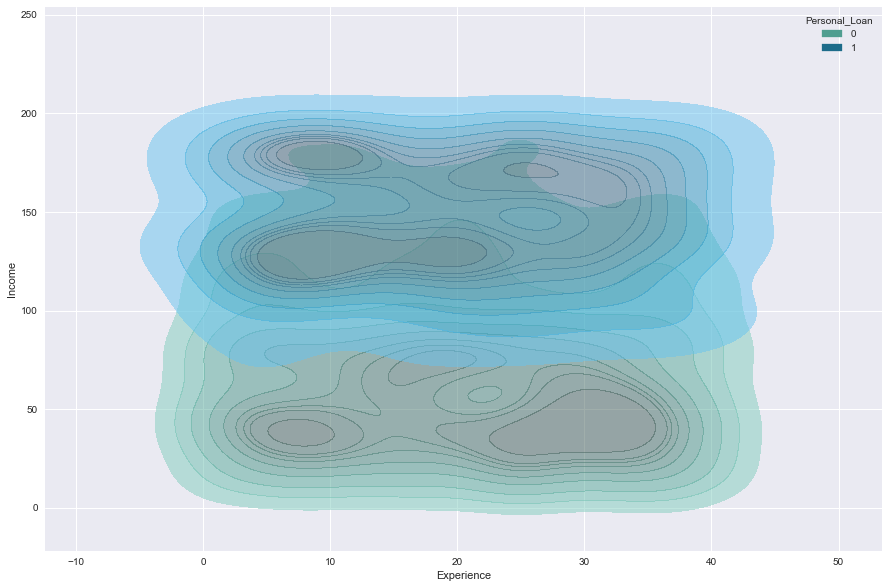

In [27]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['Experience'], df['Income'],hue = "Personal_Loan",data=df, color='red',shade=True,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

<AxesSubplot:xlabel='Mortgage', ylabel='Experience'>

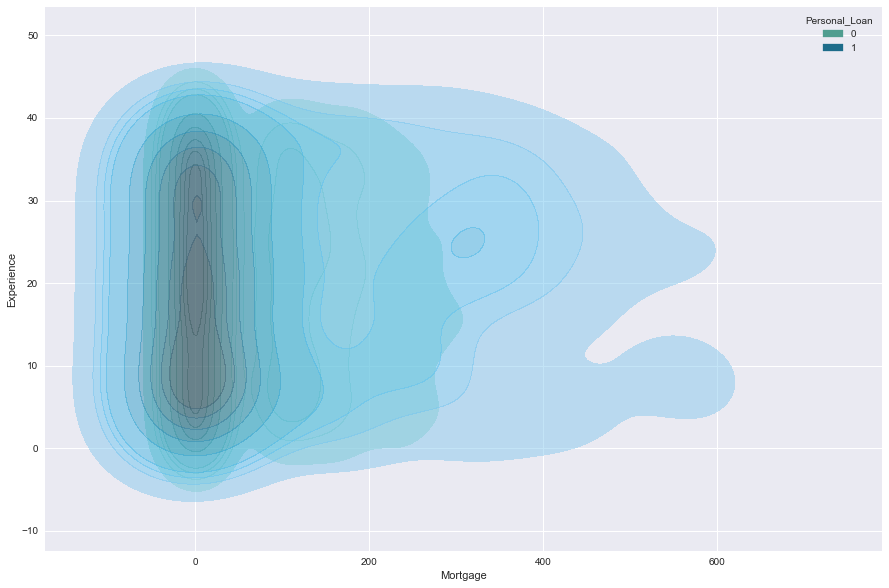

In [28]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['Mortgage'], df['Experience'],hue = "Personal_Loan",data=df, color='red',shade=True,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

<AxesSubplot:xlabel='Mortgage', ylabel='CCAvg'>

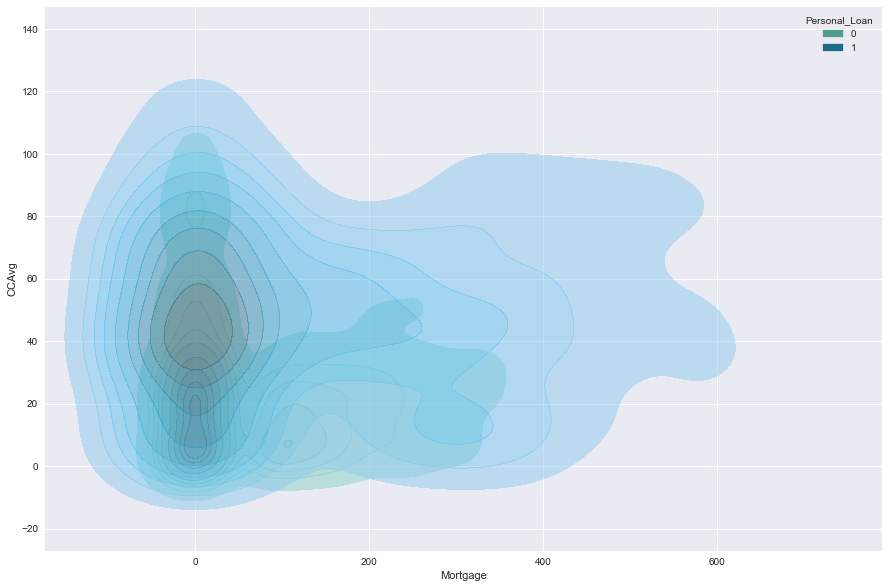

In [29]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['Mortgage'], df['CCAvg'],hue = "Personal_Loan",data=df, color='red',shade=True,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

<AxesSubplot:xlabel='CCAvg', ylabel='Experience'>

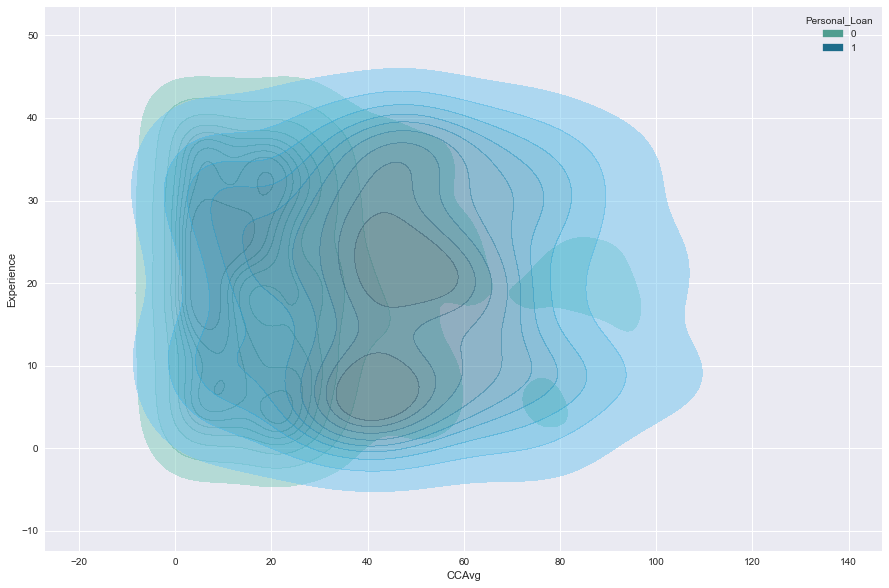

In [30]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['CCAvg'], df['Experience'],hue = "Personal_Loan",data=df, color='red',shade=True,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

<AxesSubplot:xlabel='Experience', ylabel='Age'>

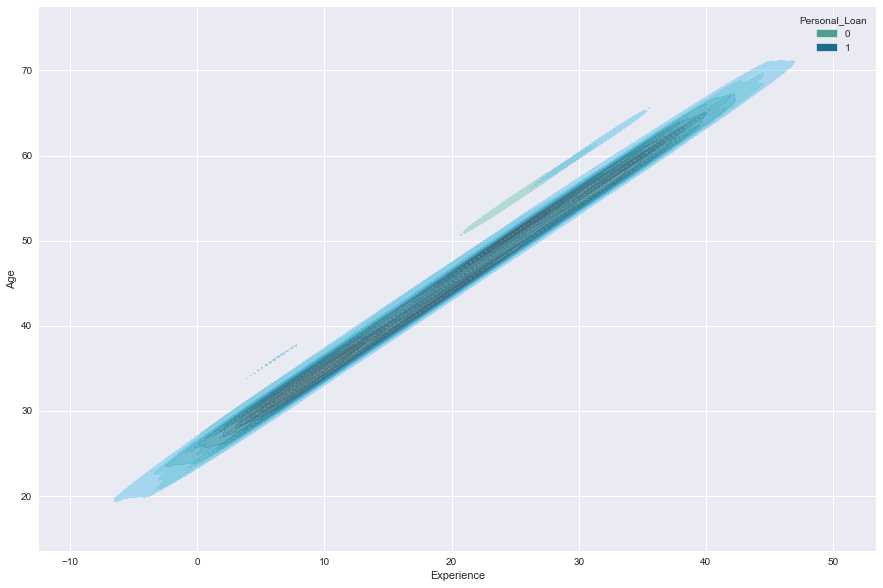

In [31]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['Experience'], df['Age'],hue = "Personal_Loan",data=df, color='red',shade=True,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

<AxesSubplot:xlabel='Mortgage', ylabel='Age'>

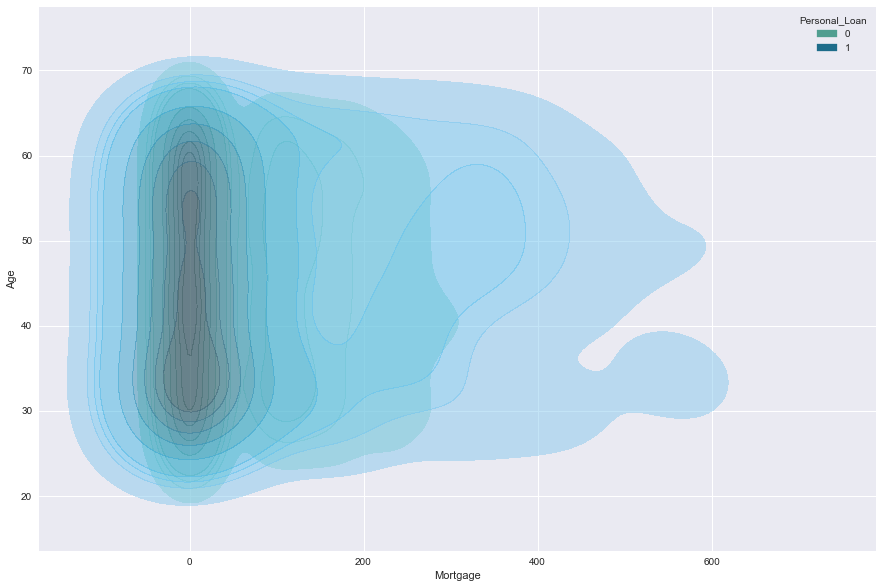

In [32]:
plt.figure(figsize = (15,10))
sns.kdeplot(df['Mortgage'], df['Age'],hue = "Personal_Loan",data=df, color='red',shade=True,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

# 
# 
# Making model
## 
## compare Algorithms

### making x, y,....  with testsize=0.2 for different algorithms

In [33]:
x = df. drop('Personal_Loan', axis =1)
y = df.Personal_Loan.values.reshape(-1,1) # Target variable
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 ,random_state = 0)

### simple Logestic regression

In [34]:

logreg = LogisticRegression(solver='liblinear', C=50)
logreg.fit(x_train,y_train.ravel())
y_pred = logreg.predict(x_test)
print('f1 score is:', metrics.f1_score(y_test, y_pred))

f1 score is: 0.7307692307692307


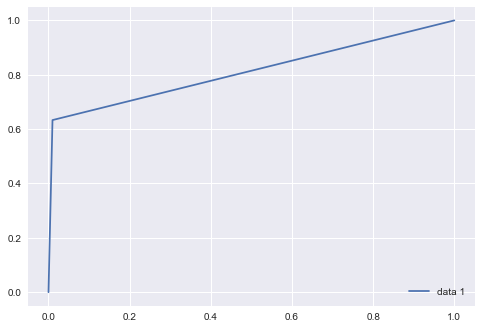

In [35]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

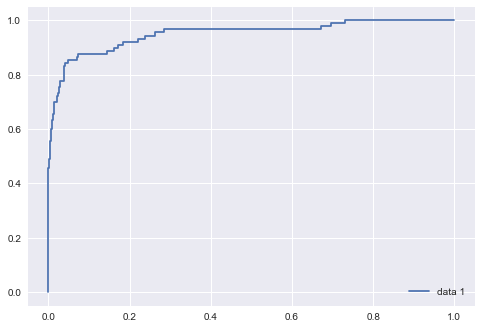

In [36]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

In [37]:
confusion_matrix(y_test, y_pred)

array([[901,   9],
       [ 33,  57]], dtype=int64)

In [38]:
print('Logestic regression classification_report:\n\n',classification_report(y_test,y_pred))

Logestic regression classification_report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       910
           1       0.86      0.63      0.73        90

    accuracy                           0.96      1000
   macro avg       0.91      0.81      0.85      1000
weighted avg       0.96      0.96      0.96      1000



### cost functions for logestic model

In [39]:
#zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss for logestic model is:',metrics.zero_one_loss(y_test, y_pred))

#The Brier score is appropriate for binary and categorical outcomes that can be structured as true or false
print('brier_score_loss for logestic model is:',metrics.brier_score_loss(y_test, y_pred))

#The Hamming loss is the fraction of labels that are incorrectly predicted
print('hamming_loss for logestic model is:',metrics.hamming_loss(y_test, y_pred))

zero_one_loss for logestic model is: 0.04200000000000004
brier_score_loss for logestic model is: 0.042
hamming_loss for logestic model is: 0.042


### Accuracy of logestic regression:0.96
### f1 score is:0.7307692307692307
### cost function is: 0.042



# 
## Logestic regression (class_weight='balanced')

In [40]:
logreg = LogisticRegression(solver='liblinear', C=50 ,class_weight='balanced')
logreg.fit(x_train,y_train.ravel())
y_pred = logreg.predict(x_test)
print('f1 score is:', metrics.f1_score(y_test, y_pred))

f1 score is: 0.5939849624060151


In [41]:
print('Logestic regression (class_weight=\'balanced\') classification_report:\n\n',classification_report(y_test,y_pred))

Logestic regression (class_weight='balanced') classification_report:

               precision    recall  f1-score   support

           0       0.99      0.89      0.94       910
           1       0.45      0.88      0.59        90

    accuracy                           0.89      1000
   macro avg       0.72      0.89      0.77      1000
weighted avg       0.94      0.89      0.91      1000



In [42]:
confusion_matrix(y_test, y_pred)

array([[813,  97],
       [ 11,  79]], dtype=int64)

In [43]:
#zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss:',metrics.zero_one_loss(y_test, y_pred))

#The Brier score is appropriate for binary and categorical outcomes that can be structured as true or false
print('brier_score_loss:',metrics.brier_score_loss(y_test, y_pred))

#The Hamming loss is the fraction of labels that are incorrectly predicted
print('hamming_loss:',metrics.hamming_loss(y_test, y_pred))

zero_one_loss: 0.10799999999999998
brier_score_loss: 0.108
hamming_loss: 0.108


### the attribute class_weights='balanced' , couldn't improve f1_score
# 

## Logestic regression (finding best manual class_weight)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

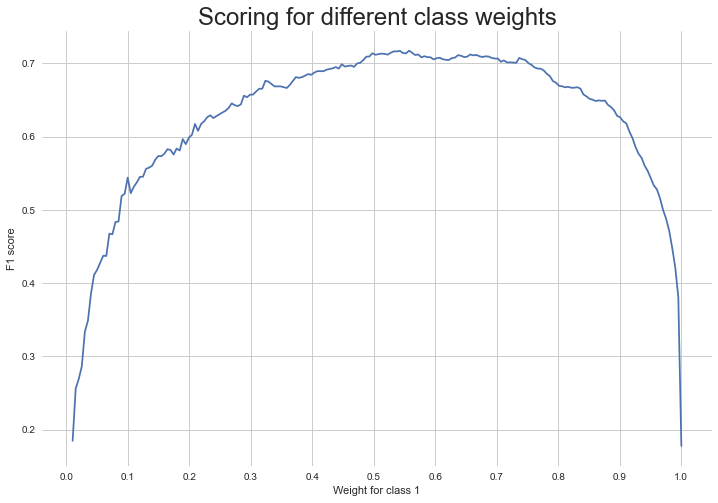

In [44]:
#finding best class weights with grid search

from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression(solver='liblinear', C=50)


weights = np.linspace(0.0,0.99,200)#this distance should be apart to 200

#search over class_weight parameter values for LogisticRegression estimator.
#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= logreg, 
                          param_grid= param_grid,
                          cv=5, 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2)#Controls the verbosity: the higher, the more messages
                        

gridsearch.fit(x_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))

# what is cv_results_? the gridsearch metrics for one combination of  two parameters
#Remember the goal of a gridsearch is to select which combination of parameters will have the best performance metrics.
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
#If you do gridsearch.best_score_ this will return the max value of the gridsearch.cv_results_['mean_test_score']

sns.lineplot(weigh_data['weight'], weigh_data['score'])
#sns.lineplot((1- weights), gridsearch.scoring)
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [45]:
gridsearch.best_score_

0.717451643791468

In [46]:
gridsearch.best_params_

{'class_weight': {0: 0.4427638190954774, 1: 0.5572361809045225}}

In [47]:
logreg = LogisticRegression(solver='liblinear', C=50 ,class_weight={0: 0.4427638190954774, 1: 0.5572361809045225})
logreg.fit(x_train,y_train.ravel())
y_pred = logreg.predict(x_test)
print('f1 score is:', metrics.f1_score(y_test, y_pred))

f1 score is: 0.7421383647798742


In [48]:
print('Logestic regression (manual class_weight​)',classification_report(y_test,y_pred))

Logestic regression (manual class_weight​)               precision    recall  f1-score   support

           0       0.97      0.99      0.98       910
           1       0.86      0.66      0.74        90

    accuracy                           0.96      1000
   macro avg       0.91      0.82      0.86      1000
weighted avg       0.96      0.96      0.96      1000



In [49]:
confusion_matrix(y_test, y_pred)

array([[900,  10],
       [ 31,  59]], dtype=int64)

In [50]:
#zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss:',metrics.zero_one_loss(y_test, y_pred))

#The Brier score is appropriate for binary and categorical outcomes that can be structured as true or false
print('brier_score_loss:',metrics.brier_score_loss(y_test, y_pred))

#The Hamming loss is the fraction of labels that are incorrectly predicted
print('hamming_loss:',metrics.hamming_loss(y_test, y_pred))

zero_one_loss: 0.041000000000000036
brier_score_loss: 0.041
hamming_loss: 0.041


### above picture shows:
### 1 - best manual 'class_weight': {0: 0.4427638190954774, 1: 0.5572361809045225}
### 2 - best manual f1 score is: 0.7421383647798742
### 3 - cost function : 0.041
# 

# 
## KNN Algorithm

####  finding best k

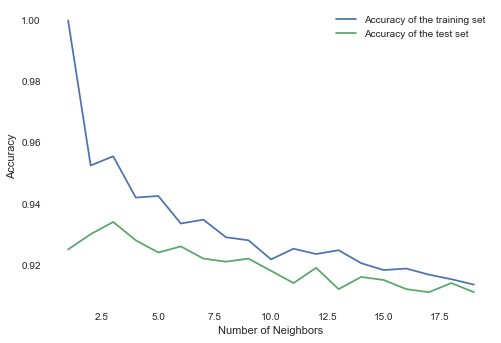

In [51]:
training_acc = []
test_acc = []
neighbors_setting = range(1,20)
for n_neighbors in neighbors_setting:
    knn_model = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn_model.fit(x_train,y_train.ravel())
    training_acc.append(knn_model.score(x_train,y_train))
    test_acc.append(knn_model.score(x_test,y_test))

plt.plot(neighbors_setting ,training_acc , label = "Accuracy of the training set" )
plt.plot(neighbors_setting ,test_acc , label = "Accuracy of the test set" )
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()

In [52]:
K = 20
Acc = np.zeros((K))# making matrix of zeros with k dimention
for i in range(1,K+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train,y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.f1_score(y_test,y_pred)
    
Acc    

array([0.57142857, 0.46153846, 0.5875    , 0.4375    , 0.47945205,
       0.41269841, 0.45833333, 0.39694656, 0.48      , 0.39705882,
       0.41891892, 0.4       , 0.40540541, 0.39130435, 0.4137931 ,
       0.35294118, 0.37762238, 0.35820896, 0.37762238, 0.38235294])

In [53]:
print(np.max(Acc))
print(np.min(Acc))

0.5875
0.3529411764705882


#### k=3 has the best f1 score
### 

In [54]:
knn_model = KNeighborsClassifier(3)
knn_model.fit(x_train,y_train.ravel())
y_pred = knn_model.predict(x_test)
print("Accuracy for knn :", metrics.accuracy_score(y_test,y_pred))

Accuracy for knn : 0.934


In [55]:
print('f1 score is:', metrics.f1_score(y_test, y_pred))

f1 score is: 0.5875


In [56]:
confusion_matrix(y_test, y_pred)

array([[887,  23],
       [ 43,  47]], dtype=int64)

In [57]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss for knn_model is:',metrics.zero_one_loss(y_test, y_pred))

#The Brier score is appropriate for binary and categorical outcomes that can be structured as true or false
print('brier_score_loss for knn_model is:',metrics.brier_score_loss(y_test, y_pred))

#The Hamming loss is the fraction of labels that are incorrectly predicted
print('hamming_loss for knn_model is:',metrics.hamming_loss(y_test, y_pred))

zero_one_loss for knn_model is: 0.06599999999999995
brier_score_loss for knn_model is: 0.066
hamming_loss for knn_model is: 0.066


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       910
           1       0.67      0.52      0.59        90

    accuracy                           0.93      1000
   macro avg       0.81      0.75      0.78      1000
weighted avg       0.93      0.93      0.93      1000



In [59]:
from sklearn.model_selection import GridSearchCV


parameters = {"n_neighbors": range(1,50)}
grid_kn = GridSearchCV(estimator = knn_model ,  #model
                      param_grid = parameters , #Range of k
                      scoring = "f1", #strategy to evaluate the performance of the cross-validated on the test set
                      cv = 5 ,#crossvalidation generator. yuo can writea loop for diffrent folds
                      verbose = 1 , #Time to calculate
                      n_jobs = -1) #Help to cpu

grid_kn.fit(x_train, y_train.ravel())
    
grid_kn.best_params_


Fitting 5 folds for each of 49 candidates, totalling 245 fits


{'n_neighbors': 1}


### f1 score is: 0.5875
### cost function is : 0.066

# 

## Naive bayes (Multinomial)

In [60]:
from sklearn.naive_bayes import MultinomialNB
Naive_Multinomial_model = MultinomialNB()
Naive_Multinomial_model.fit(x_train,y_train.ravel())
y_pred = Naive_Multinomial_model.predict(x_test)
print('accuracy is:',metrics.accuracy_score(y_test, y_pred))

accuracy is: 0.771


In [61]:
print('f1 score is:', metrics.f1_score(y_test, y_pred))

f1 score is: 0.34005763688760804


In [62]:
confusion_matrix(y_test, y_pred)

array([[712, 198],
       [ 31,  59]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       910
           1       0.23      0.66      0.34        90

    accuracy                           0.77      1000
   macro avg       0.59      0.72      0.60      1000
weighted avg       0.89      0.77      0.81      1000



### cost function for Naive bayes (Multinomial)

In [64]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss for knn_model is:',metrics.zero_one_loss(y_test, y_pred))

#The Brier score is appropriate for binary and categorical outcomes that can be structured as true or false
print('brier_score_loss for knn_model is:',metrics.brier_score_loss(y_test, y_pred))

#The Hamming loss is the fraction of labels that are incorrectly predicted
print('hamming_loss for knn_model is:',metrics.hamming_loss(y_test, y_pred))

zero_one_loss for knn_model is: 0.22899999999999998
brier_score_loss for knn_model is: 0.229
hamming_loss for knn_model is: 0.229


### accuracy is: 0.7793333333333333
### f1 score is: 0.34005763688760804
### cost function is : 0.229
### confusion_matrix(y_test, y_pred):
### [712, 198],
###       [ 31,  59]

# 
## Naive bayes (Gaussian)

In [65]:
clf = GaussianNB()
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)
print('accuracy is:',metrics.accuracy_score(y_test, y_pred))

accuracy is: 0.892


In [66]:
print('f1 score is:', metrics.f1_score(y_test, y_pred))

f1 score is: 0.5045871559633027


In [67]:
confusion_matrix(y_test, y_pred)

array([[837,  73],
       [ 35,  55]], dtype=int64)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       910
           1       0.43      0.61      0.50        90

    accuracy                           0.89      1000
   macro avg       0.69      0.77      0.72      1000
weighted avg       0.91      0.89      0.90      1000



### cost function for Gaussian

In [69]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss for knn_model is:',metrics.zero_one_loss(y_test, y_pred))

#The Brier score is appropriate for binary and categorical outcomes that can be structured as true or false
print('brier_score_loss for knn_model is:',metrics.brier_score_loss(y_test, y_pred))

#The Hamming loss is the fraction of labels that are incorrectly predicted
print('hamming_loss for knn_model is:',metrics.hamming_loss(y_test, y_pred))

zero_one_loss for knn_model is: 0.10799999999999998
brier_score_loss for knn_model is: 0.108
hamming_loss for knn_model is: 0.108


### accuracy is: 0.892
### f1 score is: 0.5045871559633027
### cost function is: 0.108
### confusion_matrix(y_test, y_pred):
### [837,  73],
###       [ 35,  55]
# 

# 
## ranking models for original data

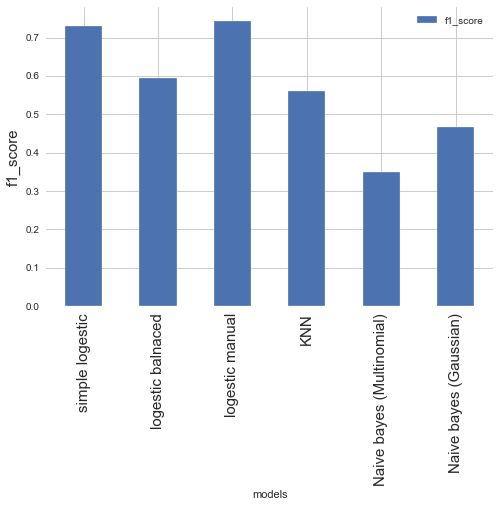

In [70]:
df12 = pd.DataFrame({'models':['simple logestic','logestic balnaced','logestic manual', 'KNN', 'Naive bayes (Multinomial)', 'Naive bayes (Gaussian)'], 'f1_score':[0.7307692307692307,0.5939849624060151,0.7421383647798742, 0.5610859728506787, 0.3497053045186641, 0.4672897196261682]})
ax = df12.plot.bar(x='models', y='f1_score', rot=90)
plt.xticks(fontsize=15)
plt.ylabel("f1_score",fontsize=15)
plt.show()

  
### So Logestic manual regression is the best for imbalanced data
# 
# 
# Improve model(with smote)

 ## balancing data by adding Synthetic samples(smote method)
 ### Synthetic Minority Oversampling Technique (SMOTE)
 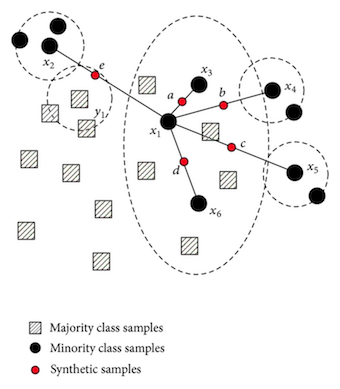
 ###  SMOTE first selects a minority class instance (x1) at random, and finds its k nearest minority class neighbors(typically k=5). The synthetic instance(a), is then created by choosing one of the k nearest neighbors (x3), at random and connecting x1 and x3 to form a line segment in the feature space. The synthetic instances(a), are generated as a convex combination of the two chosen instances x1 and x3.



In [71]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [72]:
# produce Synthetic samples for minority class
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state =3)
x_smote, y_smote = smote.fit_resample(x, y)

# compare original and resample

u = pd.DataFrame(y)
p = pd.DataFrame(y_smote)
print('Original dataset:\n ',u.value_counts())
print('Resample dataset: \n',p.value_counts())


Original dataset:
  0    4520
1     480
dtype: int64
Resample dataset: 
 0    4520
1    4520
dtype: int64


In [73]:
# making new dataframe with Synthetic samples of smote method
#x_smote = pd.DataFrame(x_smote)
frames = [x_smote,p]
df_smote = pd.concat(frames,axis=1)
df_smote = df_smote.rename(columns={0:'Personal_Loan'})
df_smote

Age  Experience  Income  Family       CCAvg  Education  Mortgage  \
0      25           1      49       4   19.200000          1         0   
1      45          19      34       3   18.000000          1         0   
2      39          15      11       1   12.000000          1         0   
3      35           9     100       1   32.400000          2         0   
4      35           8      45       4   12.000000          2         0   
...   ...         ...     ...     ...         ...        ...       ...   
9035   56          32     163       3   69.324869          2       114   
9036   33           7     142       2   53.166754          1         0   
9037   57          31     124       1    2.879528          1         0   
9038   40          15     139       3   79.902632          1         0   
9039   37          11     188       1  112.402663          2         0   

      Securities_Account  CD_Account  Online  CreditCard  Personal_Loan  
0                      1           0       0           0              0  
1                      1           0       0           0              0  
2                      0           0       0           0              0  
3                      0           0       0           0              0  
4                      0           0       0           1              0  
...                  ...         ...     ...         ...            ...  
9035                   0           0       0           0              1  
9036                   0           0       0           0              1  
9037                   0           0       1           0              1  
9038                   0           0       1           0              1  
9039                   0           0       0           0              1  

[9040 rows x 12 columns]

## all models after adding Synthetic samples

In [74]:
#train and test spilit part
x_smote_train , x_smote_test , y_smote_train , y_smote_test = train_test_split(x_smote,y_smote,test_size=0.2 ,random_state =3)

# 
### logestic regression

In [75]:
logreg_smote = LogisticRegression(solver='liblinear', C=50 )
logreg_smote.fit(x_smote_train,y_smote_train)
y_smote_pred = logreg_smote.predict(x_smote_test)
print('f1 score is:', metrics.f1_score(y_smote_test, y_smote_pred))

f1 score is: 0.9075360769641904


In [76]:
confusion_matrix(y_smote_test, y_smote_pred)

array([[786,  86],
       [ 87, 849]], dtype=int64)

In [77]:
print(classification_report(y_smote_test, y_smote_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       872
           1       0.91      0.91      0.91       936

    accuracy                           0.90      1808
   macro avg       0.90      0.90      0.90      1808
weighted avg       0.90      0.90      0.90      1808



In [78]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss is:',metrics.zero_one_loss(y_smote_test, y_smote_pred))

zero_one_loss is: 0.0956858407079646


# 
### KNN model

In [79]:
knn_model = KNeighborsClassifier(1)
knn_model.fit(x_smote_train,y_smote_train)
y_smote_pred = knn_model.predict(x_smote_test)
print('f1 score is:', metrics.f1_score(y_smote_test, y_smote_pred))

f1 score is: 0.9737670514165792


In [80]:
confusion_matrix(y_smote_test, y_smote_pred)

array([[830,  42],
       [  8, 928]], dtype=int64)

In [81]:
print(classification_report(y_smote_test, y_smote_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       872
           1       0.96      0.99      0.97       936

    accuracy                           0.97      1808
   macro avg       0.97      0.97      0.97      1808
weighted avg       0.97      0.97      0.97      1808



In [82]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss is:',metrics.zero_one_loss(y_smote_test, y_smote_pred))

zero_one_loss is: 0.027654867256637128


# 
### Multinomial Naive bayes

In [83]:
Naive_Multinomial_model = MultinomialNB()
Naive_Multinomial_model.fit(x_smote_train,y_smote_train)
y_smote_pred = Naive_Multinomial_model.predict(x_smote_test)
print('f1 score is:', metrics.f1_score(y_smote_test, y_smote_pred))

f1 score is: 0.7891949152542372


In [84]:
confusion_matrix(y_smote_test, y_smote_pred)

array([[665, 207],
       [191, 745]], dtype=int64)

In [85]:
print(classification_report(y_smote_test, y_smote_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       872
           1       0.78      0.80      0.79       936

    accuracy                           0.78      1808
   macro avg       0.78      0.78      0.78      1808
weighted avg       0.78      0.78      0.78      1808



In [86]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss is:',metrics.zero_one_loss(y_smote_test, y_smote_pred))

zero_one_loss is: 0.22013274336283184


# 
### Gaussian naive bayes

In [87]:
clf = GaussianNB()
clf.fit(x_smote_train,y_smote_train)
y_smote_pred = clf.predict(x_smote_test)
print('f1 score is:', metrics.f1_score(y_smote_test, y_smote_pred))

f1 score is: 0.8941176470588236


In [88]:
confusion_matrix(y_smote_test, y_smote_pred)

array([[774,  98],
       [100, 836]], dtype=int64)

In [89]:
print(classification_report(y_smote_test, y_smote_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       872
           1       0.90      0.89      0.89       936

    accuracy                           0.89      1808
   macro avg       0.89      0.89      0.89      1808
weighted avg       0.89      0.89      0.89      1808



In [90]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss is:',metrics.zero_one_loss(y_smote_test, y_smote_pred))

zero_one_loss is: 0.10951327433628322


# 
# Improve model(with ADASYN)
# 
### ADASYN: Adaptive Synthetic Sampling (a generalized form of the SMOTE algorithm)

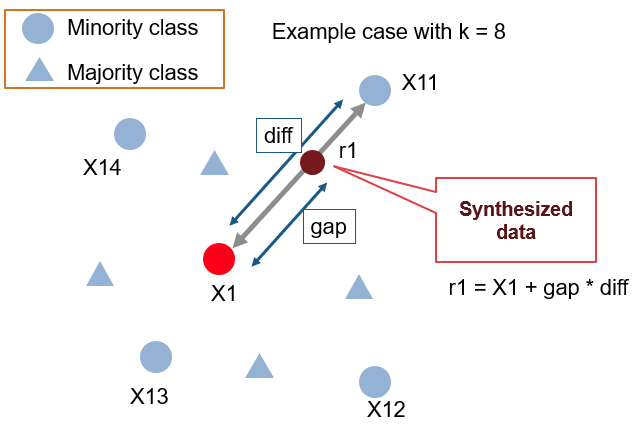

In [91]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state =15)
x_ada, y_ada = ada.fit_resample(x, y)

# compare original and resample
m = pd.DataFrame(y)
n = pd.DataFrame(y_ada)
print('Original dataset:\n ',m.value_counts())
print('Resample dataset: \n',n.value_counts())


Original dataset:
  0    4520
1     480
dtype: int64
Resample dataset: 
 0    4520
1    4473
dtype: int64


In [92]:
x_ada_train , x_ada_test , y_ada_train , y_ada_test = train_test_split(x_ada,y_ada,test_size=0.2 ,random_state =2)

# 
### logestic regresson

In [93]:
logreg_ada = LogisticRegression(solver='liblinear', C=50 )
logreg_ada.fit(x_ada_train,y_ada_train)
y_ada_pred = logreg_ada.predict(x_ada_test)
print('f1 score is:', metrics.f1_score(y_ada_test, y_ada_pred))

f1 score is: 0.8750719631548647


In [94]:
confusion_matrix(y_ada_test, y_ada_pred)

array([[822, 123],
       [ 94, 760]], dtype=int64)

In [95]:
print(classification_report(y_ada_test, y_ada_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       945
           1       0.86      0.89      0.88       854

    accuracy                           0.88      1799
   macro avg       0.88      0.88      0.88      1799
weighted avg       0.88      0.88      0.88      1799



In [96]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss is:',metrics.zero_one_loss(y_ada_test, y_ada_pred))

zero_one_loss is: 0.12062256809338523


# 
### knn model

In [97]:
knn_ada = KNeighborsClassifier(1)
knn_ada.fit(x_ada_train,y_ada_train)
y_ada_pred = knn_ada.predict(x_ada_test)
print('f1 score is:', metrics.f1_score(y_ada_test, y_ada_pred))

f1 score is: 0.9546998867497168


In [98]:
confusion_matrix(y_ada_test, y_ada_pred)

array([[876,  69],
       [ 11, 843]], dtype=int64)

In [99]:
print(classification_report(y_ada_test, y_ada_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       945
           1       0.92      0.99      0.95       854

    accuracy                           0.96      1799
   macro avg       0.96      0.96      0.96      1799
weighted avg       0.96      0.96      0.96      1799



In [100]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss is:',metrics.zero_one_loss(y_ada_test, y_ada_pred))

zero_one_loss is: 0.04446914952751524


# 
### Multinomial Naive bayes

In [101]:
Naive_Multinomial_model = MultinomialNB()
Naive_Multinomial_model.fit(x_ada_train,y_ada_train)
y_ada_pred = Naive_Multinomial_model.predict(x_ada_test)
print('f1 score is:', metrics.f1_score(y_ada_test, y_ada_pred))

f1 score is: 0.7583098591549295


In [102]:
confusion_matrix(y_ada_test, y_ada_pred)

array([[697, 248],
       [181, 673]], dtype=int64)

In [103]:
print(classification_report(y_ada_test, y_ada_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       945
           1       0.73      0.79      0.76       854

    accuracy                           0.76      1799
   macro avg       0.76      0.76      0.76      1799
weighted avg       0.76      0.76      0.76      1799



In [104]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss is:',metrics.zero_one_loss(y_ada_test, y_ada_pred))

zero_one_loss is: 0.23846581434130076


# 
### Gaussian naive bayes

In [105]:
clf = GaussianNB()
clf.fit(x_ada_train,y_ada_train)
y_ada_pred = clf.predict(x_ada_test)
print('f1 score is:', metrics.f1_score(y_ada_test, y_ada_pred))

f1 score is: 0.8675115207373271


In [106]:
confusion_matrix(y_ada_test, y_ada_pred)

array([[816, 129],
       [101, 753]], dtype=int64)

In [107]:
print(classification_report(y_ada_test, y_ada_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       945
           1       0.85      0.88      0.87       854

    accuracy                           0.87      1799
   macro avg       0.87      0.87      0.87      1799
weighted avg       0.87      0.87      0.87      1799



In [108]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss is:',metrics.zero_one_loss(y_ada_test, y_ada_pred))

zero_one_loss is: 0.12784880489160644


# 
# 
## compare results smote and ada

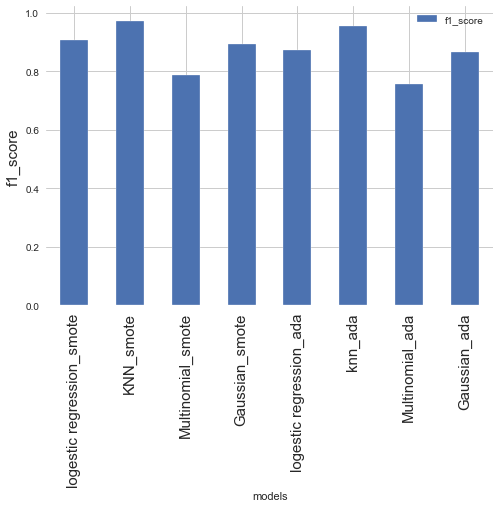

In [109]:
df13 = pd.DataFrame({'models':['logestic regression_smote','KNN_smote','Multinomial_smote','Gaussian_smote','logestic regression_ada', 'knn_ada', 'Multinomial_ada', 'Gaussian_ada'], 'f1_score':[0.9075360769641904,0.9737670514165792,0.7891949152542372,0.8941176470588236,0.8750719631548647, 0.9546998867497168, 0.7583098591549295, 0.8675115207373271 ]})
ax = df13.plot.bar(x='models', y='f1_score', rot=90)
plt.xticks(fontsize=15)
plt.ylabel("f1_score",fontsize=15)
plt.show()

### so KNN_smote is the best model
# 
## improve model with rise dimention

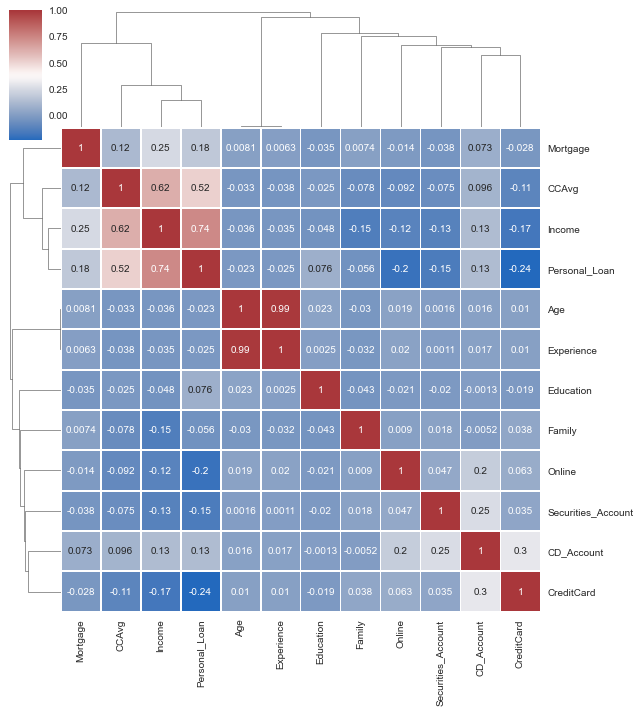

In [110]:
# correlation after adding Synthetic samples 
sns.clustermap(df_smote.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2),annot = True, linewidths = .8, figsize = (9,10))
plt.show()

#### 1 - Income                                                                          
#### 2 - CCAvg                                                                           
#### 3 - CreditCard
#### 4 - Online
#### 5 - Mortgage
#### 6-  Securities_Account
#### 7 -CD_Account
#### 8 - Family
#### 9 - Experience
#### 10 - Age
#### 11 -  Education
### Age & Experience are high correlated
###  Income & CCAvg are high correlated
### securities_Account & CD_Account have some correlation
### Mortgage and Income have some correlation

# 
### make a function for dimention 2

In [111]:
# making a dataframe without target to make function
x1 = pd.DataFrame(df_smote , columns=['Income','Family','Education','Securities_Account','CD_Account','Online','CreditCard',
                                'Age','Experience','CCAvg','Mortgage'])
x = df_smote. drop('Personal_Loan', axis =1)
# making function
def check(pow,testsize):
    f1_score = 0.9737670514165792
    for column in x1:
        j = column+ str(pow)
        n = x1[column]**pow
        x.insert(0, j, n)
        x_train , x_test , y_train , y_test = train_test_split(x,y_smote,test_size=testsize ,random_state = 3)
        knn_model = KNeighborsClassifier(1)
        knn_model.fit(x_train,y_train)
        y_pred = knn_model.predict(x_test)
        f1_score_new = metrics.f1_score(y_test , y_pred)
        if f1_score_new < f1_score:
            x.drop([j],axis =1,inplace = True)
        else:
            f1_score = f1_score_new
    print('f1_score:',f1_score)    

In [112]:
check(2,0.2)

f1_score: 0.9815886375591794


### add dimention 3

In [113]:
def check(pow,testsize):
    f1_score = 0.9815886375591794
    for column in x1:
        j = column+ str(pow)
        n = x1[column]**pow
        x.insert(0, j, n)
        x_train , x_test , y_train , y_test = train_test_split(x,y_smote,test_size=testsize ,random_state = 3)
        knn_model = KNeighborsClassifier(1)
        knn_model.fit(x_train,y_train)
        y_pred = knn_model.predict(x_test)
        f1_score_new = metrics.f1_score(y_test , y_pred)
        if f1_score_new < f1_score:
            x.drop([j],axis =1,inplace = True)
        else:
            f1_score = f1_score_new
    print('f1_score:',f1_score)   

In [114]:
check(3,0.2)

f1_score: 0.9836065573770493


In [115]:
def check(pow,testsize):
    f1_score = 0.9836065573770493
    for column in x1:
        j = column+ str(pow)
        n = x1[column]**pow
        x.insert(0, j, n)
        x_train , x_test , y_train , y_test = train_test_split(x,y_smote,test_size=testsize ,random_state = 3)
        knn_model = KNeighborsClassifier(1)
        knn_model.fit(x_train,y_train)
        y_pred = knn_model.predict(x_test)
        f1_score_new = metrics.f1_score(y_test , y_pred)
        if f1_score_new < f1_score:
            x.drop([j],axis =1,inplace = True)
        else:
            f1_score = f1_score_new
    print('f1_score:',f1_score)   

In [116]:
check(4,0.2)

f1_score: 0.9861995753715499


### dimention more than 4 , is not effective
# 

## columns of x

In [117]:
for column in x:
    print(column)

Online4
CD_Account4
Securities_Account4
Education4
CreditCard3
Online3
CD_Account3
Securities_Account3
Education3
CreditCard2
Online2
CD_Account2
Securities_Account2
Education2
Family2
Age
Experience
Income
Family
CCAvg
Education
Mortgage
Securities_Account
CD_Account
Online
CreditCard


In [118]:
compare = (pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()}))
compare

Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          1
..      ...        ...
995       0          0
996       0          0
997       0          0
998       0          0
999       0          0

[1000 rows x 2 columns]

# 
### trying KFold upon to f1 score

In [119]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10)
results = cross_val_score(knn_model, x, y_smote, cv=k_fold, n_jobs=1, scoring='f1')
print(results)
print(np.mean(results))

[0.86294416 0.86343612 0.88888889 0.84615385 0.87292818 0.9762931
 0.99443826 0.99722684 0.99611327 0.99611327]
0.929453595076906


In [120]:
df2 = pd.DataFrame(df_smote.Personal_Loan)
frames = [df2,x]
df3 = pd.concat(frames,axis=1)

df4 = df3[df3.index < 3*904]
df5 = df3[df3.index > 5*904]
df6 = df4.append(df5)
df6.reset_index(drop = True , inplace = True)

y2 = df6.Personal_Loan.values.reshape(-1,1)
x2 = df6.drop(['Personal_Loan'], axis = 1)
x2_train , x2_test , y2_train , y2_test = train_test_split(x2,y2,test_size = 0.2,random_state = 3)
knn_model = KNeighborsClassifier(1)
knn_model.fit(x2_train,y2_train)
y2_pred = knn_model.predict(x2_test)
f1_score_new = metrics.f1_score(y2_test , y2_pred)
if f1_score_new > 0.9861995753715499:
    print(f1_score_new)
else:
    print('lower')
            
    

0.9870422535211267


In [121]:
0.9870422535211267-0.9861995753715499

0.0008426781495768365

####  f1 score after cross validation: 0.9870422535211267
#### I desided not to use cross validation because:
#### cross validation could   improve f1 score for 0.0008 . so I desided not  to reduse data by cross validation
# 
# 

### final model report

In [122]:
x_train , x_test , y_train , y_test = train_test_split(x,y_smote,test_size=0.2 ,random_state = 3)
knn_model = KNeighborsClassifier(1)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)

In [123]:
#the zero_one_loss return the fraction of misclassifications (float)
print('zero_one_loss for knn_model:',metrics.zero_one_loss(y_test, y_pred))

#The Brier score is appropriate for binary and categorical outcomes that can be structured as true or false
print('brier_score_loss for knn_model is:',metrics.brier_score_loss(y_test, y_pred))

#The Hamming loss is the fraction of labels that are incorrectly predicted
print('hamming_loss for knn_model is:',metrics.hamming_loss(y_test, y_pred))

zero_one_loss for knn_model: 0.014380530973451378
brier_score_loss for knn_model is: 0.014380530973451327
hamming_loss for knn_model is: 0.014380530973451327


In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       872
           1       0.98      0.99      0.99       936

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



In [125]:
confusion_matrix(y_test, y_pred)

array([[853,  19],
       [  7, 929]], dtype=int64)

# 
##     REPORT TABLE :
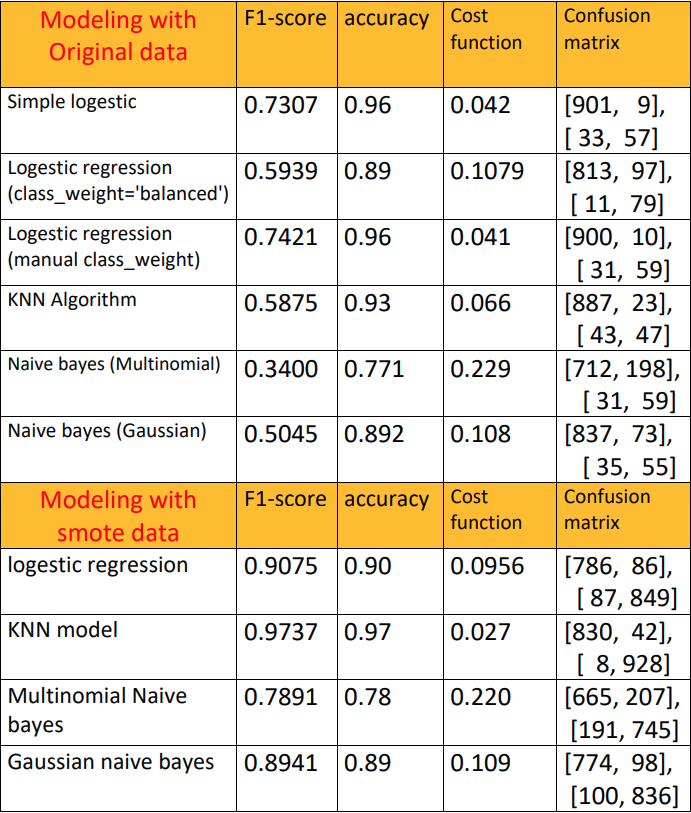
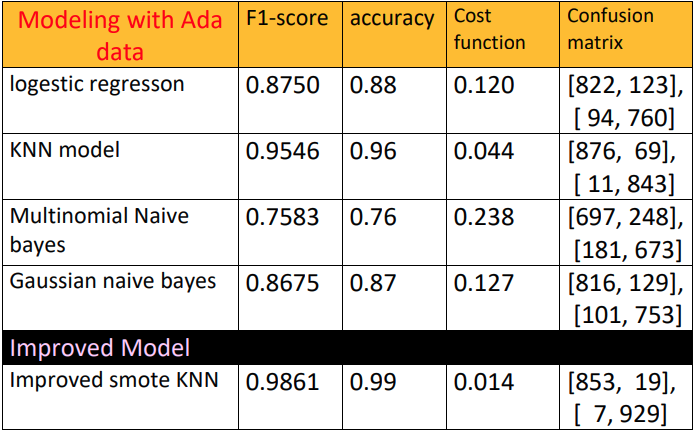

# 
# Prediction
### Will this costomer accept personal loan?
#### ID = 5071
#### Age = 42
#### Experience = 16
#### Income = 30
#### Zipcode = 92037
#### Family = 3
#### CCAvg = 1.2 * 12 = 14.4
#### Education = Advanced = 3
#### Mortgage = 0
#### Securities_Account = 1
#### CD_Account = 0
#### Online = 1
#### CreditCard = 1


# 
## prediction with the model who has learned 80% of data

In [126]:
predict = knn_model.predict([[1,0,0,3**4,1,1,0,1,3**3,1,1,0,1,3**2,3**2,42,16,30,3,14.4,3,0,1,0,1,1]])
predict

array([0], dtype=int64)


# 
## prediction with the model who has learned 100% of data

In [127]:
df2 = pd.DataFrame(df_smote.Personal_Loan)
frames = [df2,x]
df_final = pd.concat(frames,axis=1)
df_final

Personal_Loan  Online4  CD_Account4  Securities_Account4  Education4  \
0                 0        0            0                    1           1   
1                 0        0            0                    1           1   
2                 0        0            0                    0           1   
3                 0        0            0                    0          16   
4                 0        0            0                    0          16   
...             ...      ...          ...                  ...         ...   
9035              1        0            0                    0          16   
9036              1        0            0                    0           1   
9037              1        1            0                    0           1   
9038              1        1            0                    0           1   
9039              1        0            0                    0          16   

      CreditCard3  Online3  CD_Account3  Securities_Account3  Education3  ...  \
0               0        0            0                    1           1  ...   
1               0        0            0                    1           1  ...   
2               0        0            0                    0           1  ...   
3               0        0            0                    0           8  ...   
4               1        0            0                    0           8  ...   
...           ...      ...          ...                  ...         ...  ...   
9035            0        0            0                    0           8  ...   
9036            0        0            0                    0           1  ...   
9037            0        1            0                    0           1  ...   
9038            0        1            0                    0           1  ...   
9039            0        0            0                    0           8  ...   

      Experience  Income  Family       CCAvg  Education  Mortgage  \
0              1      49       4   19.200000          1         0   
1             19      34       3   18.000000          1         0   
2             15      11       1   12.000000          1         0   
3              9     100       1   32.400000          2         0   
4              8      45       4   12.000000          2         0   
...          ...     ...     ...         ...        ...       ...   
9035          32     163       3   69.324869          2       114   
9036           7     142       2   53.166754          1         0   
9037          31     124       1    2.879528          1         0   
9038          15     139       3   79.902632          1         0   
9039          11     188       1  112.402663          2         0   

      Securities_Account  CD_Account  Online  CreditCard  
0                      1           0       0           0  
1                      1           0       0           0  
2                      0           0       0           0  
3                      0           0       0           0  
4                      0           0       0           1  
...                  ...         ...     ...         ...  
9035                   0           0       0           0  
9036                   0           0       0           0  
9037                   0           0       1           0  
9038                   0           0       1           0  
9039                   0           0       0           0  

[9040 rows x 27 columns]

In [128]:
Age = 42
Experience = 16
Income = 30
Family = 3
CCAvg =  14.4
Education = 3
Mortgage = 0
Securities_Account = 1
CD_Account = 0
Online = 1
CreditCard = 1

Model_Input = pd.DataFrame({'Personal_Loan':1,
                            'Online4':[Online**4],
                            'CD_Account4':[CD_Account**4],
                            'Securities_Account4':[Securities_Account**4],
                            'Education4':[Education**4],
                            'CreditCard3':[CreditCard*3],
                            'Online3':[Online**3],
                            'CD_Account3':[CD_Account**3],
                            'Securities_Account3':[Securities_Account**3],
                            'Education3':[Education**3],
                            'CreditCard2':[CreditCard**2],
                            'Online2':[Online**2],
                            'CD_Account2':[CD_Account**2],
                            'Securities_Account2':[Securities_Account**2],
                            'Education2':[Education**2],
                            'Family2':[Family**2],
                            'Age':[Age],
                            'Experience':[Experience],
                            'Income':[Income],
                            'Family':[Family],
                            'CCAvg':[CCAvg],
                            'Education':[Education],
                            'Mortgage':[Mortgage],
                            'Securities_Account':[Securities_Account],
                            'CD_Account':[CD_Account],
                            'Online':[Online],
                            'CreditCard':[CreditCard]})

In [129]:
Model_Input

Personal_Loan  Online4  CD_Account4  Securities_Account4  Education4  \
0              1        1            0                    1          81   

   CreditCard3  Online3  CD_Account3  Securities_Account3  Education3  ...  \
0            3        1            0                    1          27  ...   

   Experience  Income  Family  CCAvg  Education  Mortgage  Securities_Account  \
0          16      30       3   14.4          3         0                   1   

   CD_Account  Online  CreditCard  
0           0       1           1  

[1 rows x 27 columns]

In [130]:
final = df_final.append(Model_Input)
final

Personal_Loan  Online4  CD_Account4  Securities_Account4  Education4  \
0                 0        0            0                    1           1   
1                 0        0            0                    1           1   
2                 0        0            0                    0           1   
3                 0        0            0                    0          16   
4                 0        0            0                    0          16   
...             ...      ...          ...                  ...         ...   
9036              1        0            0                    0           1   
9037              1        1            0                    0           1   
9038              1        1            0                    0           1   
9039              1        0            0                    0          16   
0                 1        1            0                    1          81   

      CreditCard3  Online3  CD_Account3  Securities_Account3  Education3  ...  \
0               0        0            0                    1           1  ...   
1               0        0            0                    1           1  ...   
2               0        0            0                    0           1  ...   
3               0        0            0                    0           8  ...   
4               1        0            0                    0           8  ...   
...           ...      ...          ...                  ...         ...  ...   
9036            0        0            0                    0           1  ...   
9037            0        1            0                    0           1  ...   
9038            0        1            0                    0           1  ...   
9039            0        0            0                    0           8  ...   
0               3        1            0                    1          27  ...   

      Experience  Income  Family       CCAvg  Education  Mortgage  \
0              1      49       4   19.200000          1         0   
1             19      34       3   18.000000          1         0   
2             15      11       1   12.000000          1         0   
3              9     100       1   32.400000          2         0   
4              8      45       4   12.000000          2         0   
...          ...     ...     ...         ...        ...       ...   
9036           7     142       2   53.166754          1         0   
9037          31     124       1    2.879528          1         0   
9038          15     139       3   79.902632          1         0   
9039          11     188       1  112.402663          2         0   
0             16      30       3   14.400000          3         0   

      Securities_Account  CD_Account  Online  CreditCard  
0                      1           0       0           0  
1                      1           0       0           0  
2                      0           0       0           0  
3                      0           0       0           0  
4                      0           0       0           1  
...                  ...         ...     ...         ...  
9036                   0           0       0           0  
9037                   0           0       1           0  
9038                   0           0       1           0  
9039                   0           0       0           0  
0                      1           0       1           1  

[9041 rows x 27 columns]

In [131]:
X_train = final.drop(['Personal_Loan'],axis=1)[:9040]
Y_train = final[['Personal_Loan']][:9040]
x_final = final.drop(['Personal_Loan'],axis=1)[9040:]
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [132]:
y_pred = knn_model.predict(x_final)
y_pred

array([0], dtype=int64)

## prediction shows that the person doesn't accept loan
## final f1 score : 0.9861995753715499